In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [4]:
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

In [5]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

600

In [45]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

# Import the datetime module from the datetime library.
from datetime import datetime

# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [9]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1

# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | oranjestad
Processing Record 2 of Set 1 | chuncheng
Processing Record 3 of Set 1 | hobart
Processing Record 4 of Set 1 | rikitea
Processing Record 5 of Set 1 | cienfuegos
Processing Record 6 of Set 1 | hermanus
Processing Record 7 of Set 1 | san patricio
Processing Record 8 of Set 1 | pacific grove
Processing Record 9 of Set 1 | caravelas
Processing Record 10 of Set 1 | mar del plata
Processing Record 11 of Set 1 | husum
Processing Record 12 of Set 1 | luorong
Processing Record 13 of Set 1 | nichinan
Processing Record 14 of Set 1 | narsaq
Processing Record 15 of Set 1 | sakakah
Processing Record 16 of Set 1 | jamestown
Processing Record 17 of Set 1 | nome
Processing Record 18 of Set 1 | talnakh
Processing Record 19 of Set 1 | majene
Processing Record 20 of Set 1 | yellowknife
Processing Record 21 of Set 1 | komsomolskiy
Processing Record 22 of Set 1 | carnarvon
Processing Record 23 of Set 1 | lor

Processing Record 39 of Set 4 | mahebourg
Processing Record 40 of Set 4 | los llanos de aridane
Processing Record 41 of Set 4 | riyadh
Processing Record 42 of Set 4 | kununurra
Processing Record 43 of Set 4 | sao joao da barra
Processing Record 44 of Set 4 | bilibino
Processing Record 45 of Set 4 | katobu
Processing Record 46 of Set 4 | burica
City not found. Skipping...
Processing Record 47 of Set 4 | walvis bay
Processing Record 48 of Set 4 | seddon
Processing Record 49 of Set 4 | chara
Processing Record 50 of Set 4 | kazalinsk
City not found. Skipping...
Processing Record 1 of Set 5 | zonguldak
Processing Record 2 of Set 5 | tutoia
Processing Record 3 of Set 5 | rawson
Processing Record 4 of Set 5 | mersing
Processing Record 5 of Set 5 | selma
Processing Record 6 of Set 5 | quatre cocos
Processing Record 7 of Set 5 | marcona
City not found. Skipping...
Processing Record 8 of Set 5 | nikolskoye
Processing Record 9 of Set 5 | bandarbeyla
Processing Record 10 of Set 5 | clyde river
Pro

Processing Record 30 of Set 8 | sidi qasim
City not found. Skipping...
Processing Record 31 of Set 8 | beyneu
Processing Record 32 of Set 8 | ust-maya
Processing Record 33 of Set 8 | marsabit
Processing Record 34 of Set 8 | emerald
Processing Record 35 of Set 8 | half moon bay
Processing Record 36 of Set 8 | okha
Processing Record 37 of Set 8 | coihaique
Processing Record 38 of Set 8 | damghan
Processing Record 39 of Set 8 | omsukchan
Processing Record 40 of Set 8 | gimli
Processing Record 41 of Set 8 | malwan
City not found. Skipping...
Processing Record 42 of Set 8 | matara
Processing Record 43 of Set 8 | hulan ergi
Processing Record 44 of Set 8 | artyk
City not found. Skipping...
Processing Record 45 of Set 8 | fairbanks
Processing Record 46 of Set 8 | mongo
Processing Record 47 of Set 8 | severodvinsk
Processing Record 48 of Set 8 | tocopilla
Processing Record 49 of Set 8 | tlalpujahua
City not found. Skipping...
Processing Record 50 of Set 8 | san cristobal
Processing Record 1 of 

Processing Record 17 of Set 12 | kattivakkam
Processing Record 18 of Set 12 | la romana
Processing Record 19 of Set 12 | pierre
Processing Record 20 of Set 12 | bima
Processing Record 21 of Set 12 | fonte boa
Processing Record 22 of Set 12 | honningsvag
Processing Record 23 of Set 12 | treuchtlingen
Processing Record 24 of Set 12 | oriximina
Processing Record 25 of Set 12 | atar
Processing Record 26 of Set 12 | ambodifototra
City not found. Skipping...
Processing Record 27 of Set 12 | maniitsoq
Processing Record 28 of Set 12 | antofagasta
Processing Record 29 of Set 12 | awjilah
Processing Record 30 of Set 12 | bilma
Processing Record 31 of Set 12 | trinidad
Processing Record 32 of Set 12 | amzya
Processing Record 33 of Set 12 | irbit
Processing Record 34 of Set 12 | beira
Processing Record 35 of Set 12 | vao
Processing Record 36 of Set 12 | tall kayf
Processing Record 37 of Set 12 | liberal
Processing Record 38 of Set 12 | cuenca
Processing Record 39 of Set 12 | puerto narino
Processi

In [10]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Oranjestad,12.5240,-70.0270,82.35,80,20,7.00,AW,2021-05-31 01:34:06
1,Chuncheng,22.1731,111.7886,90.01,61,96,6.44,CN,2021-05-31 01:34:07
2,Hobart,-42.8794,147.3294,51.26,75,0,1.01,AU,2021-05-31 01:34:07
3,Rikitea,-23.1203,-134.9692,75.15,70,64,12.01,PF,2021-05-31 01:34:07
4,Cienfuegos,22.1461,-80.4356,75.34,78,57,5.75,CU,2021-05-31 01:34:08
5,Hermanus,-34.4187,19.2345,55.90,71,100,7.83,ZA,2021-05-31 01:34:08
6,San Patricio,28.0170,-97.5169,81.01,79,18,11.74,US,2021-05-31 01:34:08
7,Pacific Grove,36.6177,-121.9166,83.44,77,1,4.00,US,2021-05-31 01:32:59
8,Caravelas,-17.7125,-39.2481,73.71,87,42,5.57,BR,2021-05-31 01:34:09
9,Mar Del Plata,-38.0023,-57.5575,49.08,69,0,10.00,AR,2021-05-31 01:31:42


In [18]:
new_column_order = ["City", "Country", "Date","Lat","Lng","Max Temp","Humidity","Cloudiness","Wind Speed"]
city_data_df = city_data_df[new_column_order]
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Oranjestad,AW,2021-05-31 01:34:06,12.5240,-70.0270,82.35,80,20,7.00
1,Chuncheng,CN,2021-05-31 01:34:07,22.1731,111.7886,90.01,61,96,6.44
2,Hobart,AU,2021-05-31 01:34:07,-42.8794,147.3294,51.26,75,0,1.01
3,Rikitea,PF,2021-05-31 01:34:07,-23.1203,-134.9692,75.15,70,64,12.01
4,Cienfuegos,CU,2021-05-31 01:34:08,22.1461,-80.4356,75.34,78,57,5.75
5,Hermanus,ZA,2021-05-31 01:34:08,-34.4187,19.2345,55.90,71,100,7.83
6,San Patricio,US,2021-05-31 01:34:08,28.0170,-97.5169,81.01,79,18,11.74
7,Pacific Grove,US,2021-05-31 01:32:59,36.6177,-121.9166,83.44,77,1,4.00
8,Caravelas,BR,2021-05-31 01:34:09,-17.7125,-39.2481,73.71,87,42,5.57
9,Mar Del Plata,AR,2021-05-31 01:31:42,-38.0023,-57.5575,49.08,69,0,10.00


In [19]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [20]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

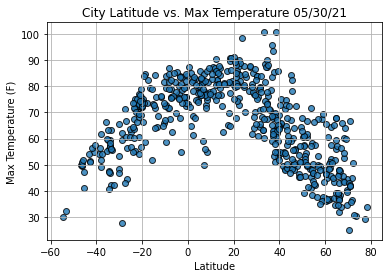

In [21]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

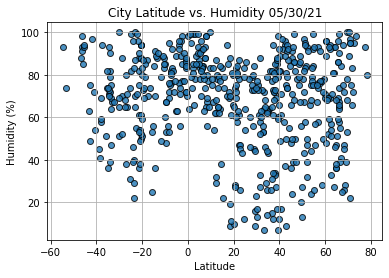

In [22]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

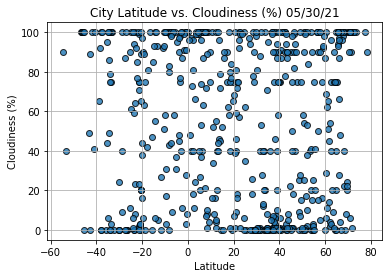

In [23]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

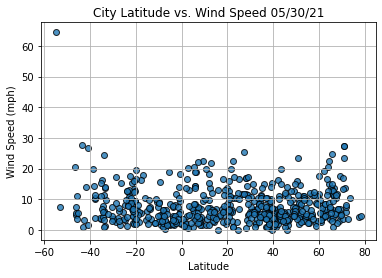

In [24]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [26]:
# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [27]:
city_data_df.loc[(city_data_df["Lat"] >= 0)].head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Oranjestad,AW,2021-05-31 01:34:06,12.5240,-70.0270,82.35,80,20,7.00
1,Chuncheng,CN,2021-05-31 01:34:07,22.1731,111.7886,90.01,61,96,6.44
4,Cienfuegos,CU,2021-05-31 01:34:08,22.1461,-80.4356,75.34,78,57,5.75
6,San Patricio,US,2021-05-31 01:34:08,28.0170,-97.5169,81.01,79,18,11.74
7,Pacific Grove,US,2021-05-31 01:32:59,36.6177,-121.9166,83.44,77,1,4.00


In [28]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

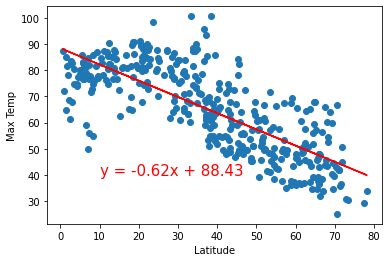

In [29]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(10,40))

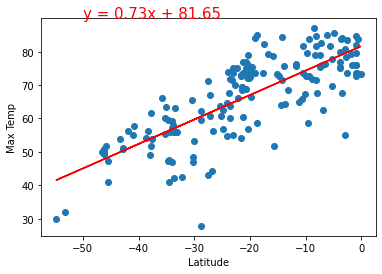

In [30]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(-50,90))

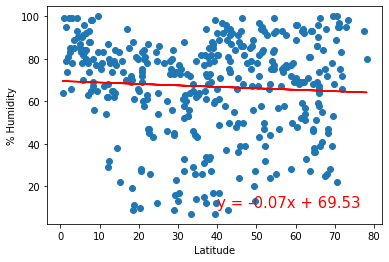

In [31]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Humidity', '% Humidity',(40,10))

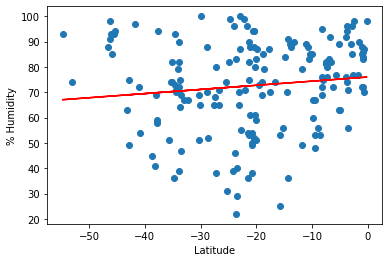

In [33]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Humidity', '% Humidity',(-50,15))

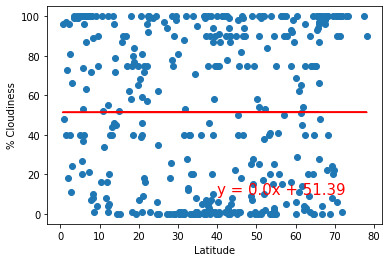

In [41]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(40,10))

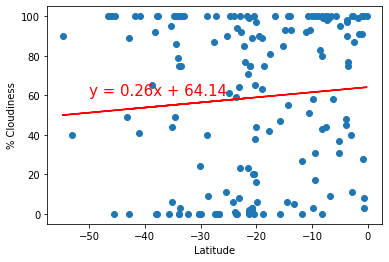

In [40]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(-50,60))

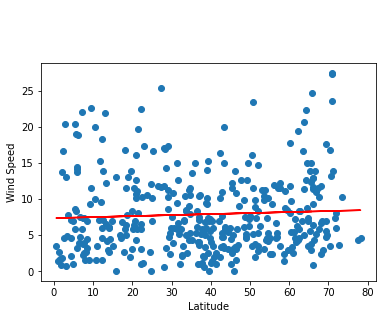

In [43]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Wind Speed', 'Wind Speed',(40,35))

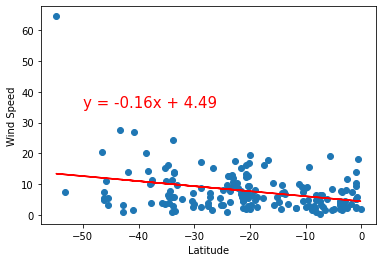

In [44]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Wind Speed', 'Wind Speed',(-50,35))